# tf.data: Build TensorFlow input pipelines
https://www.tensorflow.org/guide/data

In [4]:
import tensorflow as tf

In [5]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [6]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

In [7]:
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [8]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [9]:
it = iter(dataset)
next(it).numpy()

8

In [8]:
?dataset.reduce

In [11]:
dataset.reduce(0, lambda state, value: state + value).numpy()

22

In [12]:
# a single component
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [13]:
# a tuple of component (NB: note the shape!!!!)
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [14]:
# a nested tuple of components
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [15]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values = [1, 2], dense_shape = [3, 4]))
dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [16]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [17]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval = 1, maxval = 10, dtype = tf.int32)
)
for z in dataset1:
    print(z.numpy())

[7 6 7 8 4 1 8 2 5 8]
[7 1 4 7 6 2 2 5 5 4]
[2 4 7 4 5 3 7 4 1 4]
[3 3 1 5 7 7 7 8 9 2]


## tensor_slices vs tensor
https://stackoverflow.com/questions/49579684/what-is-the-difference-between-dataset-from-tensors-and-dataset-from-tensor-slic

In [18]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [19]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.int32, (tf.float32, tf.int32))>

In [20]:
for a, (b, c) in dataset3:
   print('{x.shape}, {y.shape}, {z.shape}'.format(x=a,y=b,z=c)) #OK
#     print('{a.shape}, {b.shape}, {c.shape}'.format(a,b,c)) # WRONG
#     print('{a.shape}, {b.shape}, {c.shape}'.format(a=a,b=b,c=c)) # OK

(10,), (), (100,)
(10,), (), (100,)
(10,), (), (100,)
(10,), (), (100,)


In [21]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [22]:
images, labels = train

In [23]:
images = images / 255

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [25]:
def count(stop):
    i = 0
    while i < stop:
        yield i
        i += 1

In [26]:
for n in count(5):
    print(n)

0
1
2
3
4


In [27]:
ds_counter = tf.data.Dataset.from_generator(count, args = [25], output_types=tf.int32, output_shapes=(),)

In [28]:
# repeat allows to restart the generator when `count` reaches the end
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [29]:
for count_batch in ds_counter.batch(10).take(10):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24]


In [30]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(0, 10)
        yield i, np.random.normal(size=(size,))
        i += 1

In [31]:
for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break

0 : [-0.1741 -1.0766  0.0456 -1.5756 -0.4273 -0.9306 -0.5615]
1 : [ 0.0882  0.6804 -0.941  -0.6569 -1.507  -0.4358]
2 : [-1.0111 -0.745   0.115  -0.3549]
3 : [ 0.0527 -0.6387 -0.07   -0.151  -0.9664]
4 : [-0.1511]
5 : []
6 : [-0.4455 -0.9803  0.5628 -0.3393 -0.8725 -1.2349  0.1238]


In [32]:
ds_series = tf.data.Dataset.from_generator(
    gen_series,
    output_types=(tf.int32, tf.float32),
    output_shapes=((), (None, )) # the first term is a scalar, and the second is a vector of unknown length
)
ds_series

<FlatMapDataset shapes: ((), (None,)), types: (tf.int32, tf.float32)>

In [34]:
# due to different version, also appear in https://github.com/tensorflow/tensorflow/issues/36308
ds_series_batch = ds_series.shuffle(20).padded_batch(10)
#ds_series_batch = ds_series.shuffle(20).padded_batch(10, padded_shapes=(None,)) wrong
ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[13 16  2  4 11 15 19  6 17 10]

[[ 0.3646 -0.4824 -1.2249  0.9846 -0.4105  1.4061  0.5314 -0.5659  0.6641]
 [-0.5101 -0.7141  0.5578  0.      0.      0.      0.      0.      0.    ]
 [-0.3827 -0.6297 -0.9222 -0.7253  0.2526  0.4412  0.7639 -0.8307  0.    ]
 [ 0.1904  2.0167 -0.5135 -0.4532  0.0677 -0.9141  0.438  -0.0978  0.8786]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.0903  0.8036  1.3293  0.8835 -0.4263  1.6505  0.      0.      0.    ]
 [-0.843   0.362  -1.1493 -0.0498 -1.5865  0.      0.      0.      0.    ]
 [ 0.0833 -0.5477 -0.4866  2.1092 -0.1489 -1.092   0.      0.      0.    ]
 [ 1.9642 -0.3961 -0.1668  0.4772 -1.0853 -0.5772 -0.4445  0.      0.    ]
 [-1.4066 -0.8456  0.1801 -0.1214  0.5508  0.      0.      0.      0.    ]]


In [35]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar = True
)

228818944/228813984 [==============================] - 2s 0us/step


In [47]:
flowers

'/home/project09/.keras/datasets/flower_photos'

In [37]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1 /255, rotation_range = 20)

In [38]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [39]:
images.dtype, images.shape

(dtype('float32'), (32, 256, 256, 3))

In [40]:
labels.dtype, labels.shape

(dtype('float32'), (32, 5))

In [41]:
i = 0
for images, labels in img_gen.flow_from_directory(flowers):
    i += 1
    print(i, images.dtype, labels.shape)

Found 3670 images belonging to 5 classes.
1 float32 (32, 5)
2 float32 (32, 5)
3 float32 (32, 5)
4 float32 (32, 5)
5 float32 (32, 5)
6 float32 (32, 5)
7 float32 (32, 5)
8 float32 (32, 5)
9 float32 (32, 5)
10 float32 (32, 5)
11 float32 (32, 5)
12 float32 (32, 5)
13 float32 (32, 5)
14 float32 (32, 5)
15 float32 (32, 5)
16 float32 (32, 5)
17 float32 (32, 5)
18 float32 (32, 5)
19 float32 (32, 5)
20 float32 (32, 5)
21 float32 (32, 5)
22 float32 (32, 5)
23 float32 (32, 5)
24 float32 (32, 5)
25 float32 (32, 5)
26 float32 (32, 5)
27 float32 (32, 5)
28 float32 (32, 5)
29 float32 (32, 5)
30 float32 (32, 5)
31 float32 (32, 5)
32 float32 (32, 5)
33 float32 (32, 5)
34 float32 (32, 5)
35 float32 (32, 5)
36 float32 (32, 5)
37 float32 (32, 5)
38 float32 (32, 5)
39 float32 (32, 5)
40 float32 (32, 5)
41 float32 (32, 5)
42 float32 (32, 5)
43 float32 (32, 5)
44 float32 (32, 5)
45 float32 (32, 5)
46 float32 (32, 5)
47 float32 (32, 5)
48 float32 (32, 5)
49 float32 (32, 5)
50 float32 (32, 5)
51 float32 (32, 5

KeyboardInterrupt: 

In [42]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32, 256, 256, 3], [32, 5])
)

In [43]:
ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [44]:
for images, label in ds.take(1):
    print('images.shape: ', images.shape)
    print('labels.shape: ', labels.shape)

Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


In [45]:
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")



7905280/7904079 [==============================] - 1s 0us/step


In [46]:
fsns_test_file

'/home/project09/.keras/datasets/fsns.tfrec'

In [48]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])

In [49]:
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [50]:
raw_example = next(iter(dataset))

In [52]:
parsed = tf.train.Example.FromString(raw_example.numpy())

In [54]:
parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

In [55]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']


In [56]:
file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

811008/807992 [==============================] - 0s 0us/step


In [57]:
dataset = tf.data.TextLineDataset(file_paths)

In [58]:
for line in dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [59]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

for i, line in enumerate(lines_ds.take(9)):
    if i % 3 == 0:
        print()
    print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'


In [60]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

32768/30874 [===============================] - 0s 0us/step


In [61]:
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [62]:
for line in titanic_lines.take(10):
    print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [63]:
def survived(line):
    return tf.not_equal(tf.strings.substr(line, 0, 1), "0")

survivors = titanic_lines.skip(1).filter(survived)

In [65]:
for line in survivors.take(10):
    print(line.numpy())

b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'
b'1,male,28.0,0,0,13.0,Second,unknown,Southampton,y'
b'1,female,28.0,0,0,7.225,Third,unknown,Cherbourg,y'
b'1,male,28.0,0,0,35.5,First,A,Southampton,y'
b'1,female,38.0,1,5,31.3875,Third,unknown,Southampton,n'


In [66]:
df = pd.read_csv(titanic_file)

In [68]:
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [70]:
dict(df)['survived']

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [77]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

In [83]:
for feature_batch in titanic_slices.take(1):
    for key, value in feature_batch.items():
        print("{!r:20s}: {}".format(key, value))
        #print("{}: {}".format(key, value))

        

'survived'          : 0
'sex'               : b'male'
'age'               : 22.0
'n_siblings_spouses': 1
'parch'             : 0
'fare'              : 7.25
'class'             : b'Third'
'deck'              : b'unknown'
'embark_town'       : b'Southampton'
'alone'             : b'n'


In [73]:
help('FORMATTING')

Format String Syntax
********************

The "str.format()" method and the "Formatter" class share the same
syntax for format strings (although in the case of "Formatter",
subclasses can define their own format string syntax).  The syntax is
related to that of formatted string literals, but there are
differences.

Format strings contain “replacement fields” surrounded by curly braces
"{}". Anything that is not contained in braces is considered literal
text, which is copied unchanged to the output.  If you need to include
a brace character in the literal text, it can be escaped by doubling:
"{{" and "}}".

The grammar for a replacement field is as follows:

      replacement_field ::= "{" [field_name] ["!" conversion] [":" format_spec] "}"
      field_name        ::= arg_name ("." attribute_name | "[" element_index "]")*
      arg_name          ::= [identifier | digit+]
      attribute_name    ::= identifier
      element_index     ::= digit+ | index_string
      index_string      ::=

In [84]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived"
)

In [85]:
for feature_batch, label_batch in titanic_batches.take(1):
    print("'survived': {}".format(label_batch))
    print("features:")
    for key, value in feature_batch.items():
        print("   {!r:20s}:{}".format(key, value))

'survived': [0 0 0 1]
features:
   'sex'               :[b'male' b'male' b'female' b'female']
   'age'               :[24. 25. 28. 15.]
   'n_siblings_spouses':[0 0 0 0]
   'parch'             :[0 0 0 0]
   'fare'              :[79.2    7.05   8.05   7.225]
   'class'             :[b'First' b'Third' b'Third' b'Third']
   'deck'              :[b'B' b'unknown' b'unknown' b'unknown']
   'embark_town'       :[b'Cherbourg' b'Southampton' b'Southampton' b'Cherbourg']
   'alone'             :[b'y' b'y' b'y' b'y']


In [86]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size = 4,
    label_name = "survived",
    select_columns=['class', 'fare', 'survived']
)

In [87]:
for feature_batch, label_batch in titanic_batches.take(1):
    print("'survived': {}".format(label_batch))
    print("features:")
    for key, value in feature_batch.items():
        print("   {!r:20s}:{}".format(key, value))

'survived': [0 1 1 0]
features:
   'fare'              :[ 11.5     31.3875  78.2667 108.9   ]
   'class'             :[b'Second' b'Third' b'First' b'First']


In [88]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string] 

In [89]:
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types, header = True)

In [90]:
for line in dataset.take(10):
    print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


In [91]:
flowers

'/home/project09/.keras/datasets/flower_photos'

In [93]:
flowers_root = pathlib.Path(flowers)

In [94]:
flowers_root

PosixPath('/home/project09/.keras/datasets/flower_photos')

In [95]:
for item in flowers_root.glob("*"):
    print(item.name)

roses
sunflowers
LICENSE.txt
tulips
daisy
dandelion


In [97]:
flowers_root/'*/*'

PosixPath('/home/project09/.keras/datasets/flower_photos/*/*')

In [98]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [99]:
for f in list_ds.take(5):
    print(f.numpy())

b'/home/project09/.keras/datasets/flower_photos/dandelion/477316928_a70a31a704_m.jpg'
b'/home/project09/.keras/datasets/flower_photos/roses/15602874619_03fd934bed.jpg'
b'/home/project09/.keras/datasets/flower_photos/tulips/16677542612_a78a8ca8b3_m.jpg'
b'/home/project09/.keras/datasets/flower_photos/roses/4242976586_607a8f9843_n.jpg'
b'/home/project09/.keras/datasets/flower_photos/tulips/16702117379_c25bff70e9.jpg'


In [100]:
def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    return tf.io.read_file(file_path), label

In [101]:
labeles_ds = list_ds.map(process_path)

In [102]:
for image_raw, label_text in labeles_ds.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00'

b'dandelion'


In [103]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


In [105]:
# note the shape
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [107]:
# ignore the last batch, and get full propagation
batched_dataset = dataset.batch(7, drop_remainder=True)
batched_dataset

<BatchDataset shapes: ((7,), (7,)), types: (tf.int64, tf.int64)>

In [108]:
dataset = tf.data.Dataset.range(100)

In [109]:
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None, ))
for batch in dataset.take(2):
    print(batch.numpy())
    print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [110]:
titanic_lines

<TextLineDatasetV2 shapes: (), types: tf.string>

In [113]:
def plot_batch_size(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)

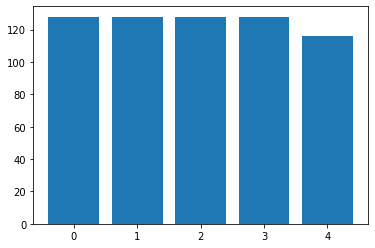

In [115]:
titanic_batches = titanic_lines.repeat(1).batch(128)
plot_batch_size(titanic_batches)

In [118]:
# is it possible to directly return the number of lines of titanic_lines???
len([line for line in titanic_lines])

628

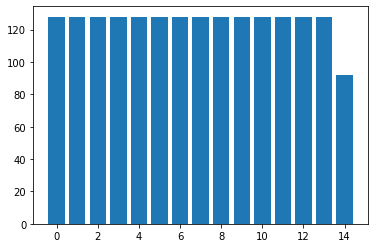

In [121]:
titanic_batches1 = titanic_lines.repeat(3).batch(128)
plot_batch_size(titanic_batches1)

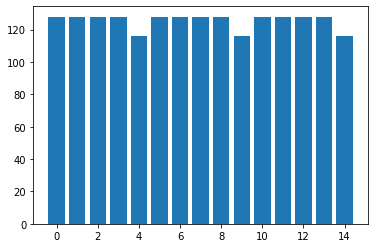

In [120]:
titanic_batches2 = titanic_lines.batch(128).repeat(3)
plot_batch_size(titanic_batches2)

In [122]:
epoches = 3
dataset = titanic_lines.batch(128)

for epoch in range(epoches):
    for batch in dataset:
        print(batch.shape)
    print("End of epoch:", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch: 0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch: 1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch: 2


In [123]:
counter = tf.data.experimental.Counter()
dataset = tf.data.Dataset.zip((counter, titanic_lines))
dataset = dataset.shuffle(buffer_size=100).batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [135]:
# the first batch contains no elements with an index over 120
# (my understanding: might be thought as after picking one element, the buffer would extend one more element)
n, line_batch = next(iter(dataset))
print(n.numpy())

[ 87  33  63  96   3  76   4   1  34   2 105  71  43 101  50  32  13  61
  99  90]


In [136]:
dataset = tf.data.Dataset.zip((counter, titanic_lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

# the total number of lines is 628, then skip 60x10
for n, line_batch in shuffled.skip(60).take(5):
    print(n.numpy())

[596 608 627 612 582 597 378 534 539 605]
[622 409 453 586 598 457 381 583 305 520]
[563 614 508 548 452 477 515 469]
[ 50  31  52 100  10  39  22  82  68  86]
[ 64  36  14   6  32  46   4  47 108  61]


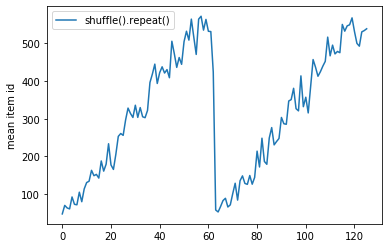

In [137]:
shuffle_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label = "shuffle().repeat()")
plt.ylabel("mean item id")
plt.legend()

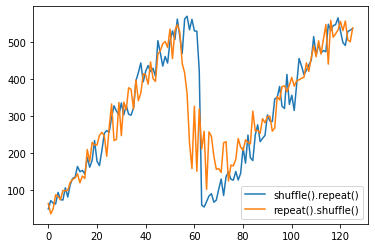

In [139]:
# but a repeat before a shuffle mixes the epoch boundaries
dataset = tf.data.Dataset.zip((counter, titanic_lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label = "shuffle().repeat()")
plt.plot(repeat_shuffle, label = "repeat().shuffle()")
plt.legend()

In [140]:
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = parts[-2]
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128]) # automatically handle RGB 3 channel??
    return image, label

In [141]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

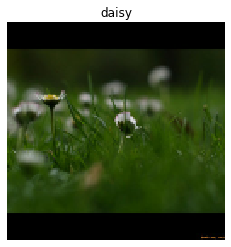

In [143]:
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis('off')

show(image, label)

In [145]:
image.shape

TensorShape([128, 128, 3])

(128, 128, 3)
(128, 128, 3)


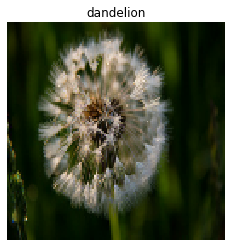

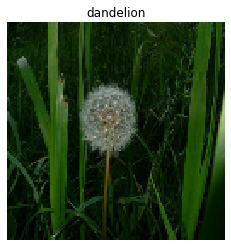

In [146]:
images_ds = list_ds.map(parse_image)
for image, label in images_ds.take(2):
    print(image.shape)
    show(image, label)

In [147]:
import scipy.ndimage as ndimage
def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape = False)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


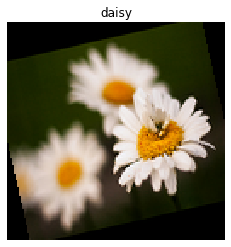

In [148]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

In [150]:
def tf_random_rotate_image(image, label):
    im_shape = image.shape
    [image, ] = tf.py_function(random_rotate_image, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

In [151]:
rot_ds = images_ds.map(tf_random_rotate_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


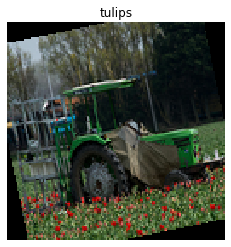

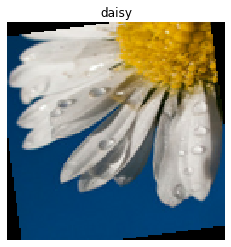

In [152]:
for image, label in rot_ds.take(2):
    show(image, label)

In [153]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [154]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

In [155]:
feature = parsed.features.feature

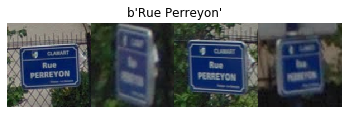

In [176]:
raw_img = feature['image/encoded'].bytes_list.value[0]
img = tf.image.decode_png(raw_img)
plt.imshow(img)
plt.axis('off')
_ = plt.title(feature["image/text"].bytes_list.value[0])

In [177]:
range_ds = tf.data.Dataset.range(20)
iterator = iter(range_ds)
ckpt = tf.train.Checkpoint(step = tf.Variable(0), iterator = iterator)
manager = tf.train.CheckpointManager(ckpt, '/tmp/my_ckpt', max_to_keep=3)
print([next(iterator).numpy() for _ in range(5)])
save_path = manager.save()
print([next(iterator).numpy() for _ in range(5)])
ckpt.restore(manager.latest_checkpoint)
print([next(iterator).numpy() for _ in range(5)])

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


In [178]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [179]:
images, labels = train
images = images/255
labels = labels.astype(np.int32)

In [180]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels)).shuffle(5000).batch(32)

In [181]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [182]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1875/1875 [==============================] - 2s 875us/step - loss: 0.5999 - accuracy: 0.7972
Epoch 2/2
1875/1875 [==============================] - 2s 813us/step - loss: 0.4611 - accuracy: 0.8427


In [183]:
model.fit(fmnist_train_ds.repeat(), epochs = 2, steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8375
Epoch 2/2
20/20 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8406


In [184]:
loss, accuracy = model.evaluate(fmnist_train_ds)

1875/1875 [==============================] - 1s 639us/step - loss: 0.4427 - accuracy: 0.8468


In [185]:
loss, accuracy = model.evaluate(fmnist_train_ds, steps = 10)

10/10 [==============================] - 0s 826us/step - loss: 0.4536 - accuracy: 0.8469


In [188]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 20)
result.shape

(640, 10)

In [189]:
result = model.predict(fmnist_train_ds, steps = 10)
result.shape

(320, 10)